In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

In [41]:
data=pd.read_csv("train.csv")

In [42]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
data.duplicated().sum()

0

In [44]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [45]:
data.dropna(subset=["Item_Weight","Outlet_Size"],inplace = True)

In [46]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Rest Index


In [47]:
data[data.duplicated()]
#data=data.drop_duplicates()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [48]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [49]:
data.reset_index(drop=True,inplace=True)

In [50]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
4,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
4645,FDF53,20.750,reg,0.083607,Frozen Foods,178.8318,OUT046,1997,Small,Tier 1,Supermarket Type1,3608.6360
4646,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
4647,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
4648,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [51]:
#Script to find the outliers
for col_name in data.select_dtypes(include=np.number).columns[:-1]:
    print(col_name)
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    print("Outliers = ",data.loc[(data[col_name] < low) | (data[col_name] > high), col_name])

Item_Weight
Outliers =  Series([], Name: Item_Weight, dtype: float64)
Item_Visibility
Outliers =  42      0.186357
69      0.183507
145     0.186033
330     0.188323
351     0.184690
486     0.184844
729     0.184042
881     0.183295
942     0.186148
1239    0.186616
1251    0.182938
1500    0.185705
1640    0.187850
1741    0.187523
1927    0.183260
2423    0.183688
2692    0.183142
3049    0.185597
3292    0.184255
3616    0.185131
3645    0.184454
3747    0.183473
3937    0.184168
4090    0.185824
4164    0.183580
4275    0.186068
4309    0.186826
4348    0.187559
Name: Item_Visibility, dtype: float64
Item_MRP
Outliers =  Series([], Name: Item_MRP, dtype: float64)
Outlet_Establishment_Year
Outliers =  Series([], Name: Outlet_Establishment_Year, dtype: int64)


In [52]:
data["Item_Visibility"]

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
4645    0.083607
4646    0.056783
4647    0.035186
4648    0.145221
4649    0.044878
Name: Item_Visibility, Length: 4650, dtype: float64

(array([785., 981., 786., 587., 476., 343., 284., 174., 140.,  94.]),
 array([0.        , 0.01883227, 0.03766453, 0.0564968 , 0.07532907,
        0.09416133, 0.1129936 , 0.13182586, 0.15065813, 0.1694904 ,
        0.18832266]),
 <BarContainer object of 10 artists>)

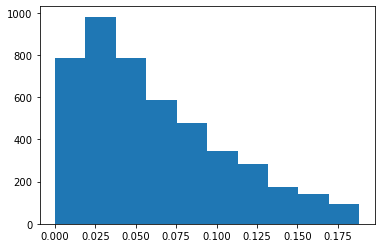

In [53]:
plt.hist(data["Item_Visibility"])

In [54]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [55]:
data["Item_Identifier"].value_counts()

FDT07    5
FDB03    5
FDF04    5
FDD52    5
FDM04    5
        ..
FDG40    1
DRN59    1
DRO59    1
FDA36    1
FDF28    1
Name: Item_Identifier, Length: 1535, dtype: int64

In [56]:
data["Item_Weight"].value_counts()

12.150    58
17.600    55
13.650    49
11.800    49
16.000    45
          ..
6.775      1
5.000      1
7.070      1
4.905      1
7.560      1
Name: Item_Weight, Length: 409, dtype: int64

In [57]:
data["Item_Fat_Content"].value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [59]:
data["Item_Fat_Content"].replace({'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'},inplace= True)

In [60]:
data["Item_Fat_Content"].value_counts()

Low Fat    3004
Regular    1646
Name: Item_Fat_Content, dtype: int64

In [61]:
data["Item_Visibility"].value_counts()

0.000000    292
0.076975      3
0.112399      2
0.112203      2
0.061271      2
           ... 
0.030122      1
0.025969      1
0.169776      1
0.094308      1
0.084436      1
Name: Item_Visibility, Length: 4280, dtype: int64

In [62]:
data["Item_Type"].value_counts()

Fruits and Vegetables    670
Snack Foods              656
Household                498
Frozen Foods             477
Dairy                    380
Canned                   361
Baking Goods             351
Health and Hygiene       277
Soft Drinks              241
Meat                     221
Breads                   132
Hard Drinks              117
Others                    91
Starchy Foods             87
Breakfast                 58
Seafood                   33
Name: Item_Type, dtype: int64

In [63]:
data["Item_MRP"].value_counts()

142.0154    6
100.1016    4
172.0422    4
146.9102    4
105.4622    3
           ..
174.4422    1
108.2280    1
168.6158    1
96.4094     1
42.0138     1
Name: Item_MRP, Length: 3806, dtype: int64

In [64]:
data["Outlet_Identifier"].value_counts()

OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT018    928
Name: Outlet_Identifier, dtype: int64

In [65]:
data["Outlet_Establishment_Year"].value_counts()

1987    932
1999    930
1997    930
2004    930
2009    928
Name: Outlet_Establishment_Year, dtype: int64

In [66]:
data["Outlet_Size"].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [67]:
data["Outlet_Location_Type"].value_counts()

Tier 3    1860
Tier 1    1860
Tier 2     930
Name: Outlet_Location_Type, dtype: int64

In [68]:
data["Outlet_Type"].value_counts()

Supermarket Type1    3722
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [28]:
data["Item_Outlet_Sales"].value_counts()

1342.2528    11
1438.1280    11
703.0848     10
958.7520     10
1416.8224     9
             ..
1751.0540     1
5077.3908     1
2403.5380     1
600.5516      1
6385.0220     1
Name: Item_Outlet_Sales, Length: 2449, dtype: int64

In [69]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4650 entries, 0 to 4649
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   float64
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 436.1+ KB


In [71]:
data.select_dtypes(include=np.number)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,8.930,0.000000,53.8614,1987,994.7052
4,10.395,0.000000,51.4008,2009,556.6088
...,...,...,...,...,...
4645,20.750,0.083607,178.8318,1997,3608.6360
4646,6.865,0.056783,214.5218,1987,2778.3834
4647,10.600,0.035186,85.1224,2004,1193.1136
4648,7.210,0.145221,103.1332,2009,1845.5976


In [72]:
data.select_dtypes(exclude=np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
4,FDP36,Regular,Baking Goods,OUT018,Medium,Tier 3,Supermarket Type2
...,...,...,...,...,...,...,...
4645,FDF53,Regular,Frozen Foods,OUT046,Small,Tier 1,Supermarket Type1
4646,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
4647,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
4648,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [73]:
numerical_data=data.select_dtypes(include=np.number)
categorical_data =data.select_dtypes(exclude=np.number)

In [74]:
#Performng standard scaling
from sklearn.preprocessing import StandardScaler
 
std_scale = StandardScaler()
df_std = std_scale.fit_transform(numerical_data)

In [75]:
numerical_data_preprocessed = pd.DataFrame(df_std,columns = numerical_data.columns)

In [76]:
categorical_data_processed = pd.get_dummies(categorical_data)

In [77]:
pre_processed_data = pd.concat([numerical_data_preprocessed,categorical_data_processed], axis = 1)

In [78]:
pre_processed_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2
0,-0.770517,-1.001154,1.731874,-0.025790,0.976831,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,-1.494212,-0.928714,-1.497218,1.327755,-1.220864,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,0.985195,-0.985173,-0.001575,-0.025790,-0.116683,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
3,-0.849738,-1.360945,-1.407620,-1.650045,-0.852804,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4,-0.536065,-1.360945,-1.447044,1.327755,-1.145296,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,1.681056,0.513570,0.594668,-0.296499,0.892372,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,0
4646,-1.291877,-0.087824,1.166496,-1.650045,0.338059,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
4647,-0.492172,-0.572045,-0.906753,0.650983,-0.720337,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4648,-1.218009,1.894998,-0.618182,1.327755,-0.284710,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [81]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression

In [87]:
data["Item_MRP"] #X

0       249.8092
1        48.2692
2       141.6180
3        53.8614
4        51.4008
          ...   
4645    178.8318
4646    214.5218
4647     85.1224
4648    103.1332
4649     75.4670
Name: Item_MRP, Length: 4650, dtype: float64

In [88]:
data["Item_Outlet_Sales"] #Y

0       3735.1380
1        443.4228
2       2097.2700
3        994.7052
4        556.6088
          ...    
4645    3608.6360
4646    2778.3834
4647    1193.1136
4648    1845.5976
4649     765.6700
Name: Item_Outlet_Sales, Length: 4650, dtype: float64

In [89]:
model=LinearRegression()

In [91]:
model.fit(data[["Item_MRP"]],data["Item_Outlet_Sales"])

LinearRegression()

In [97]:
m=model.coef_
m

array([16.30885733])

In [98]:
b=model.intercept_
b

-39.193883361783264

In [99]:
Item_MRP_model= lambda x: m*x+b


In [100]:
Item_MRP=249

In [101]:
Item_MRP_model(Item_MRP)

array([4021.71159073])

In [106]:
model.predict([[Item_MRP]])

array([4021.71159073])

In [107]:
model.predict(data[["Item_MRP"]])

array([4034.90871808,  748.02161266, 2270.43387338, ..., 1349.05519346,
       1642.79076098, 1191.58665243])

In [110]:

model_pre_Sales=model.predict(data[["Item_MRP"]])

In [111]:
actual_Sales=data["Item_Outlet_Sales"]

In [112]:
#Import error funs

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [114]:
mean_squared_error(actual_Sales,model_pre_Sales) #MSE

1207299.2416398916

In [115]:
mean_absolute_error(actual_Sales,model_pre_Sales) #MAE

810.6121974704146

In [116]:
np.sqrt(mean_squared_error(actual_Sales,model_pre_Sales))#RMSE

1098.7716967777662

In [117]:
r2_score(actual_Sales,model_pre_Sales)

0.46184775898439634

In [118]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [120]:
mean_absolute_percentage_error(actual_Sales,model_pre_Sales) #MAPE

57.03176330864679

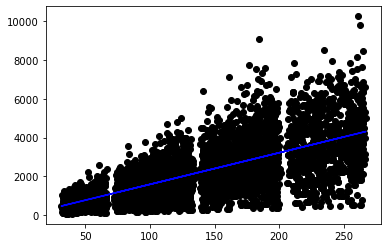

In [121]:
plt.scatter(data["Item_MRP"],data["Item_Outlet_Sales"], color='black')
plt.plot(data["Item_MRP"],model_pre_Sales, color='b')

plt.show()